In [1]:
import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt

#import dataset MNIST

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Normalisasi data (0-255 -> 0-1) dan reshape agar sesuai dengan input LeNet-5 (32x32x1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Tambahkan padding 2 pixel di tiap sisi agar ukuran gambar menjadi 32x32
x_train = tf.image.resize_with_pad(x_train[..., tf.newaxis], 32, 32)
x_test = tf.image.resize_with_pad(x_test[..., tf.newaxis], 32, 32)

In [2]:
# Model LeNet-5
model = models.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(32, 32, 1)),
    layers.AveragePooling2D(pool_size=(2, 2)),

    layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'),
    layers.AveragePooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')  # 10 kelas (0-9)
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\setrip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluasi model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8511 - loss: 0.4952 - val_accuracy: 0.9643 - val_loss: 0.1202
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9695 - loss: 0.1013 - val_accuracy: 0.9794 - val_loss: 0.0696
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9804 - loss: 0.0638 - val_accuracy: 0.9791 - val_loss: 0.0683
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9861 - loss: 0.0459 - val_accuracy: 0.9832 - val_loss: 0.0526
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9882 - loss: 0.0385 - val_accuracy: 0.9832 - val_loss: 0.0504
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9906 - loss: 0.0300 - val_accuracy: 0.9851 - val_loss: 0.0462
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9936 - loss: 0.0219 - val_accuracy: 0.9857 - val_loss: 0.0431
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9932 - loss: 0.0207 - val_accuracy: 0.

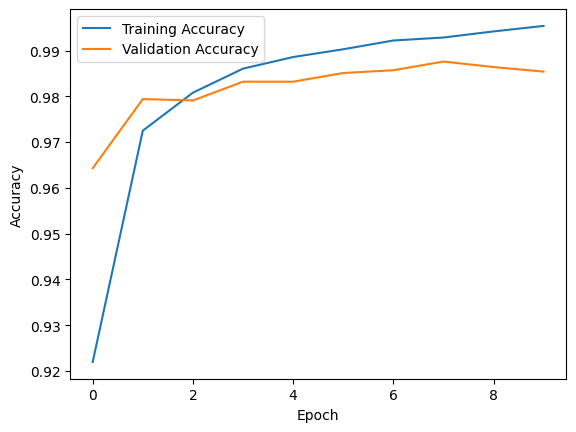

In [4]:
# Plot akurasi training dan validasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


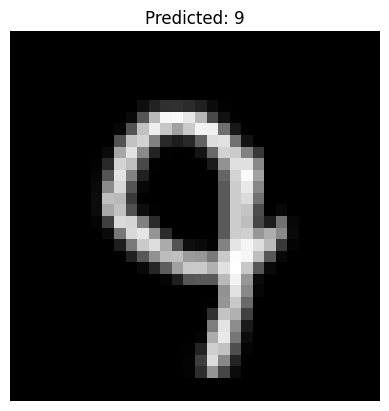

In [7]:
import numpy as np

# Ambil satu gambar dari test set
image_test = x_test[999]  # Ambil gambar pertama
sample_image = np.expand_dims(image_test, axis=0)  # Tambah batch dimensi

# Prediksi label
prediction = model.predict(sample_image)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(image_test, cmap="gray")
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()
